<a href="https://colab.research.google.com/github/oleksiyo/machine-learning-zoomcamp/blob/master/cohorts/2025/06-trees/Homework_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework

[Homework #6](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2025/06-trees/homework.md)

## Dataset

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.tree import export_text

In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-11-08 19:06:07--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.2’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.03s   

2025-11-08 19:06:07 (24.8 MB/s) - ‘car_fuel_efficiency.csv.2’ saved [874188/874188]



In [ ]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


## Preparing the dataset

#### 1. Fill missing values with zeros.

In [ ]:
df.isnull().sum()>0

,0
engine_displacement,False
num_cylinders,True
horsepower,True
vehicle_weight,False
acceleration,True
model_year,False
origin,False
fuel_type,False
drivetrain,False
num_doors,True


In [ ]:
cols_with_null= df.columns[df.isnull().sum()>0]

for col in cols_with_null:
    df[col] = df[col].fillna(0)

In [ ]:
df.isnull().sum()>0

,0
engine_displacement,False
num_cylinders,False
horsepower,False
vehicle_weight,False
acceleration,False
model_year,False
origin,False
fuel_type,False
drivetrain,False
num_doors,False


#### Do train/validation/test split with 60%/20%/20% distribution.
#### Use the train_test_split function and set the random_state parameter to 1.

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

#### Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

In [ ]:
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)

X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [ ]:
# Help fumction
def find_closest_number(numbers, target):
    closest = min(numbers, key=lambda x: abs(x - target))
    return closest

## Question 1

In [ ]:
dt = DecisionTreeRegressor(max_depth=1, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1, random_state=1)

In [ ]:
importances = pd.Series(dt.feature_importances_, index=dv.get_feature_names_out())
print(importances[importances > 0])

vehicle_weight    1.0
dtype: float64


In [ ]:
# Display the splitting rule
tree_rules = export_text(dt, feature_names=list(dv.get_feature_names_out()))
print(tree_rules)

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



#### **Answer:** vehicle_weight

## Question 2

In [ ]:
# train a random regressor
rg = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

# fit the model
rg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [ ]:
result = rg.score(X_val, y_val)

In [ ]:
expected = [0.045, 0.45, 4.5, 45.0]
print(f"The nearest number is {find_closest_number(expected, result)}")

The nearest number is 0.45


#### **Answer:** 0.45

## Question 3

In [ ]:
rmses = []

for step in range(10, 201, 10):
  rf = RandomForestRegressor(n_estimators=step, random_state=1, n_jobs=-1)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_val)

  rmse = np.sqrt(mean_squared_error(y_val, y_pred)).round(4)
  rmses.append((step, rmse))

  print(f"Step: {step} RMSE: {rmse}")

Step: 10 RMSE: 0.4596
Step: 20 RMSE: 0.4536
Step: 30 RMSE: 0.4517
Step: 40 RMSE: 0.4487
Step: 50 RMSE: 0.4467
Step: 60 RMSE: 0.4455
Step: 70 RMSE: 0.4451
Step: 80 RMSE: 0.445
Step: 90 RMSE: 0.4449
Step: 100 RMSE: 0.4447
Step: 110 RMSE: 0.4436
Step: 120 RMSE: 0.4439
Step: 130 RMSE: 0.4437
Step: 140 RMSE: 0.4434
Step: 150 RMSE: 0.4429
Step: 160 RMSE: 0.4428
Step: 170 RMSE: 0.4428
Step: 180 RMSE: 0.4424
Step: 190 RMSE: 0.4425
Step: 200 RMSE: 0.4425


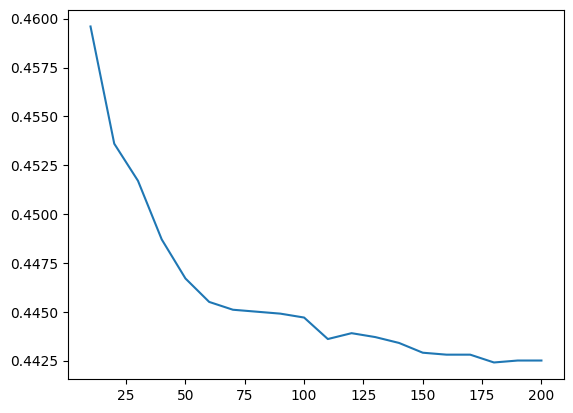

In [ ]:
df_scores = pd.DataFrame(rmses, columns=['n_estimators', 'rmse'])
plt.plot(df_scores.n_estimators, df_scores.rmse)

#### **Answer:** 80

## Question 4

In [ ]:
results = {}

for max_depth in [10, 15, 20, 25]:
    rmses = []

    for n_estimators in range(10, 201, 10):
        rf = RandomForestRegressor(
            max_depth=max_depth,
            n_estimators=n_estimators,
            random_state=1,
            n_jobs=-1
        )

        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)

        rmse = np.sqrt(mean_squared_error(y_val, y_pred))

        rmses.append(rmse)

    results[max_depth] = np.mean(rmses)

    print(f"max_depth={max_depth}, mean RMSE={results[max_depth]:.4f}")

best_depth = min(results, key=results.get)
print(f"Best max_depth: {best_depth}, RMSE={results[best_depth]:.4f}")

max_depth=10, mean RMSE=0.4418
max_depth=15, mean RMSE=0.4454
max_depth=20, mean RMSE=0.4463
max_depth=25, mean RMSE=0.4459
Best max_depth: 10, RMSE=0.4418


#### **Answer:** 10

## Question 5

In [ ]:
feature_columns = ['vehicle_weight', 'horsepower', 'acceleration', 'engine_displacement']

In [ ]:
rf = RandomForestRegressor(max_depth=20, n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

importances = rf.feature_importances_

In [ ]:
features = list(zip(df_train.columns, importances))
features = [x for x in features if x[0] in ['vehicle_weight', 'horsepower', 'acceleration', 'engine_displacement']]
features_sorted = sorted(features, key=lambda x: x[1], reverse=True)

for name, val in features_sorted:
    print(f"{name}: {val:.4f}")

engine_displacement: 0.0115
vehicle_weight: 0.0033
horsepower: 0.0003
acceleration: 0.0003


In [ ]:
best_feature, best_val = max(features_sorted, key=lambda x: x[1])
print("Feature:", best_feature, best_val)

Feature: engine_displacement 0.01147970063142938


#### **Answer:** engine_displacement

## Question 6

In [ ]:
!pip install xgboost

In [ ]:
from typing import Dict, Any, Optional, Tuple
import xgboost as xgb

In [ ]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [ ]:
def evaluate_xgb_rmse(
    eta: float,
    dtrain: xgb.DMatrix,
    dval: xgb.DMatrix,
    y_val: np.ndarray,
    watchlist: Optional[list] = None,
    num_boost_round: int = 100,
    params_override: Optional[Dict[str, Any]] = None,
    verbose: bool = True
) -> Tuple[float, Dict[str, Any]]:
    base_params = {
        'eta': eta,
        'max_depth': 6,
        'min_child_weight': 1,
        'objective': 'reg:squarederror',
        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
        'eval_metric': 'rmse',
    }
    if params_override:
        base_params.update(params_override)

    if watchlist is None:
        watchlist = [(dtrain, 'train'), (dval, 'val')]

    model = xgb.train(
        base_params,
        dtrain,
        num_boost_round=num_boost_round,
        evals=watchlist,
        verbose_eval=False
    )

    y_pred = model.predict(dval)
    rmse = float(np.sqrt(mean_squared_error(y_val, y_pred)))

    if verbose:
        print(f"eta={eta} -> RMSE={rmse:.4f}")

    info = {
        'params': base_params,
        'num_boost_round': num_boost_round,
    }
    return rmse, info

In [ ]:
etas = [0.1, 0.3]
results = []
for e in etas:
    rmse, info = evaluate_xgb_rmse(e, dtrain, dval, y_val)
    results.append((e, rmse))

best_eta, best_rmse = min(results, key=lambda x: x[1])
print("Best:", best_eta, best_rmse)

eta=0.1 -> RMSE=0.4262
eta=0.3 -> RMSE=0.4502
Best: 0.1 0.42622800553359225


#### **Answer:** 0.1